# All these datasets are obtained using ULB_bounds.nb

In [1]:
%load_ext autoreload
import sys
sys.path.append("..")
%matplotlib inline
%autoreload

import matplotlib
matplotlib.rc_file('matplotlibrc')
import matplotlib.pyplot as plt

import numpy as np

/home/oem/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:280: MatplotlibDeprecationWarning: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  import matplotlib


In [2]:
import matplotlib as mpl
def FigSetup(xlab='',ylab='',title='',\
                 x_min = 1.0e-19,x_max = 1.0e-6,\
                 y_min = 1.0e-12,y_max = 1.0e7,\
                 lw=2.5,lfs=32,tfs=32,tickdir='out',\
                 Grid=False,Shape='Rectangular'):
    
    plt.rcParams['axes.linewidth'] = lw
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif',size=tfs)
    fig = plt.figure(figsize=(13,12))


    ax = fig.add_subplot(111)

    ax.set_xlabel(xlab,fontsize=lfs)
    ax.set_ylabel(ylab,fontsize=lfs)

    ax.tick_params(which='major',direction=tickdir,width=2.5,labelsize=26,length=13,right=True,top=True,pad=10) ######
    ax.tick_params(which='minor',direction=tickdir,width=1,length=10)

    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlim([x_min,x_max])
    ax.set_ylim([y_min,y_max])
    ax.set_title(title,fontsize=30) ########

    locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=50)
    locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10)*.1,numticks=100)
    ax.xaxis.set_major_locator(locmaj)
    ax.xaxis.set_minor_locator(locmin)
    ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())

    locmaj = mpl.ticker.LogLocator(base=10.0, subs=(1.0, ), numticks=100)
    locmin = mpl.ticker.LogLocator(base=10.0, subs=np.arange(2, 10)*.1,numticks=100)
    ax.yaxis.set_major_locator(locmaj)
    ax.yaxis.set_minor_locator(locmin)
    ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    return fig,ax
    

In [3]:
data= np.loadtxt('SelfInteract_a_94NEW')
m=data[:, 0]
f=data[:,1]
data1= np.loadtxt('SelfInteract_a_5NEW')
m2=data1[:, 0]
f2=data1[:,1]

datac= np.loadtxt('CombinedPrevious')
mc=datac[:, 0]
fc=datac[:,1]

In [4]:
from scipy.interpolate import interp1d 

mDM_fine = np.arange(np.log10(m[0]), np.log10(m[-1]), .001)

mDM_fine_2 = np.arange(np.log10(m2[0]), np.log10(m2[-1]), .001)

mDM_fine_c = np.arange(np.log10(mc[0]), np.log10(mc[-1]), .001)

In [5]:
from scipy.interpolate import pchip
pch94 = pchip(np.log10(m),np.log10(f)) # for Sgr A*
pch5 = pchip(np.log10(m2), np.log10(f2))
pchc=pchip(np.log10(mc), np.log10(fc))

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


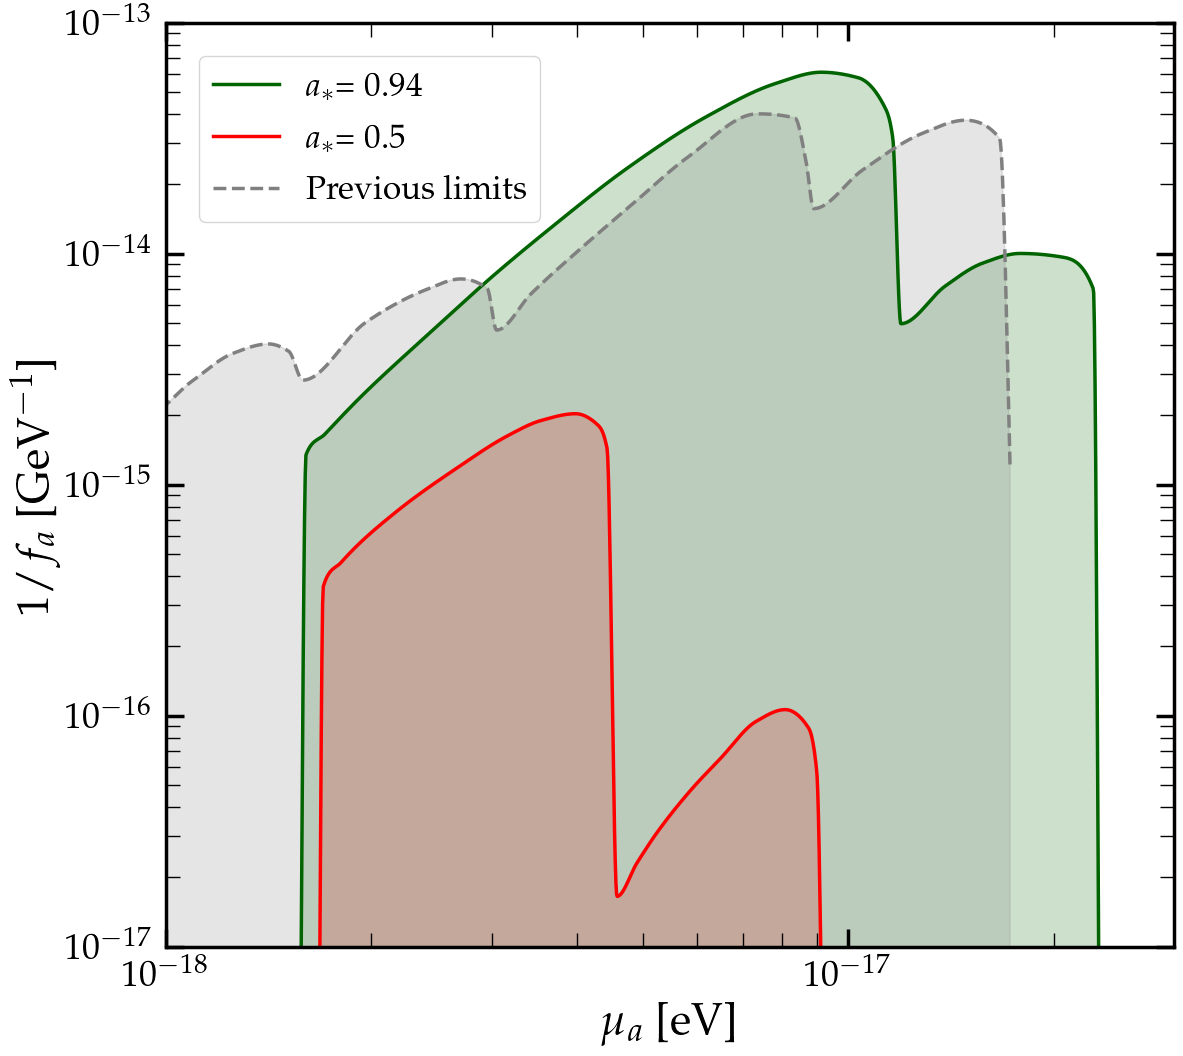

In [6]:
fig,ax = FigSetup(xlab=r'$\mu_a$ [eV]',ylab='$1/f_a$ [GeV$^{-1}$]',
                y_min=1e-17,y_max=1e-13,x_min=1e-18,x_max=3e-17,tickdir='in'
                 )

#plt.plot(10**mDM_fine_2,10**f_interp_2(mDM_fine_2),'red',lw=2.5,label='0.5')
#plt.plot(10**mDM_fine,10**f_interp(mDM_fine),'#006400',lw=2.5,label='0.94')

plt.plot(10**mDM_fine,10**pch94(mDM_fine),'#006400',lw=2.5,label='$a_*$= 0.94')
plt.plot(10**mDM_fine_2,10**pch5(mDM_fine_2),'red',lw=2.5,label='$a_*$= 0.5')

plt.plot(10**mDM_fine_c,10**pchc(mDM_fine_c),'grey',lw=2.5,linestyle='dashed',label='Previous limits')

ax = plt.gca()

ax.fill_between(
    10**mDM_fine, 
    1e-23, 
    (10**pch94(mDM_fine)), 
    interpolate=True, 
    color='#006400',
    alpha=0.2
)

ax.fill_between(
    10**mDM_fine_2, 
    1e-23, 
    (10**pch5(mDM_fine_2)), 
    interpolate=True, 
    color='red',
    alpha=0.2
)

ax.fill_between(
    10**mDM_fine_c, 
    1e-23, 
    (10**pchc(mDM_fine_c)), 
    interpolate=True, 
    color='grey',
    alpha=0.2
)
plt.legend(loc=0,prop={'size':24})
plt.show()
pltname = 'final_fa_mu'
fig.savefig('Plots_pdf/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('Plots_png/'+pltname+'.png',bbox_inches='tight')